# Introduction

The goal of this notebook would be to understand how to create a __word cloud__ from a vocabulary. Specifically, I decided to use the twitter data for this as it could help understand the trending topics on the social media. Jumping straight to it, first we import some libraries. Here, I've imported some essential Natural Language Processing libraries, `WordCloud` library for plotting a word cloud and finally, the `tweepy` library for accessing the twitter API.

# Importing Libraries

In [1]:
# NLP libraries
import langid
import pandas as pd
import numpy as np
from nltk.tokenize import RegexpTokenizer 

In [2]:
# Plotting libraries
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [10, 5]

In [3]:
# Twitter API access library
import tweepy,json

# Setting access tokens

Before we could extract the tweets from the twitter api, it is necessary to setup a twitter Develper account. It takes just 5-10 minutes to do so if you have'nt. Here's the link: https://developer.twitter.com/en/apply-for-access

After the account is setup, we need to add some credentials here. 

In [4]:
access_token= ''
access_token_secret= ''
consumer_key= ''
consumer_secret= ''

auth= tweepy.OAuthHandler(consumer_key,consumer_secret)
auth.set_access_token(access_token,access_token_secret)

# Extracting tweets

To access the tweets, a function is created below that reads the stream of tweets and stores it in a file named 'tweets.txt', which is later accessed.

In [5]:
tweet_list=[]
class MyStreamListener(tweepy.StreamListener):
    def __init__(self,api=None):
        super(MyStreamListener,self).__init__()
        self.num_tweets=0
        self.file=open("tweet.txt","w")
    def on_status(self,status):
        tweet=status._json
        self.file.write(json.dumps(tweet)+ '\n')
        tweet_list.append(status)
        self.num_tweets+=1
        if self.num_tweets<1000:
            return True
        else:
            return False
        self.file.close()

In [6]:
#create streaming object and authenticate
l = MyStreamListener()
stream =tweepy.Stream(auth,l)

#this line filters twitter streams to capture data by keywords
stream.filter(track=['bitcoin', 'cryptocurrency', 'etherium', 'elon', 'musk', 'tesla'])

In [7]:
tweets_data_path='tweet.txt'
tweets_data=[]
tweets_file=open(tweets_data_path,"r")

#read in tweets and store on list
for line in tweets_file:
    tweet=json.loads(line)
    tweets_data.append(tweet)
tweets_file.close()

print(tweets_data[1])

{'created_at': 'Fri Mar 05 09:25:47 +0000 2021', 'id': 1367768292362883076, 'id_str': '1367768292362883076', 'text': 'RT @XDCNetwork: #XDC Airdrop is live!!\n\nComplete all tasks to get 15 XDC and 10 XDC from each person referred.\n\nThe Next GEN Digital Curren…', 'source': '<a href="https://mobile.twitter.com" rel="nofollow">Twitter Web App</a>', 'truncated': False, 'in_reply_to_status_id': None, 'in_reply_to_status_id_str': None, 'in_reply_to_user_id': None, 'in_reply_to_user_id_str': None, 'in_reply_to_screen_name': None, 'user': {'id': 1288050656691933184, 'id_str': '1288050656691933184', 'name': 'Rahul', 'screen_name': 'Rahul38573890', 'location': None, 'url': None, 'description': None, 'translator_type': 'none', 'protected': False, 'verified': False, 'followers_count': 1, 'friends_count': 32, 'listed_count': 0, 'favourites_count': 65, 'statuses_count': 27, 'created_at': 'Tue Jul 28 09:56:34 +0000 2020', 'utc_offset': None, 'time_zone': None, 'geo_enabled': False, 'lang': None, 'c

# Processing the data

The tweets are read into a dataframe which would then make it easier to perform transformations. 

In [8]:
tweets_df = pd.DataFrame(columns = ['text', 'user_name'])

for tweet in tweets_data:
    
    tweets_df = tweets_df.append({'text': tweet['text'], 'user_name' : tweet['user']['name']},
                                 ignore_index = True)

In [9]:
tweets_df.head()

,text,user_name
0,RT @elaydin0: Gerzek ve açgözlü yatırımcının h...,Çerkez Hakkı
1,RT @XDCNetwork: #XDC Airdrop is live!!\n\nComp...,Rahul
2,RT @elonmusk: @skorusARK Tesla &amp; Ford are ...,Nijo B Jojy
3,@pablogc_98 @DruePhoto People are “investing” ...,nnft
4,"RT @DanPriceSeattle: ""$15 an hour is too much""...",Sean Pierce


## Removing the retweet content

It was noticed that some content had retweet information which is not relevant to our goal, so I removed it. 

In [10]:
def remove_rt(text):
    
    text = text.split()
    
    if text[0] == 'RT':
        return ' '.join(text[2:])
    else:
        return ' '.join(text)

In [11]:
tweets_df['text'] = tweets_df['text'].apply(lambda x: remove_rt(x))

## Tokenizing tweet text

Tokenizing the text is one of the most important steps in Natural language processing. I created a regex expression which was then used to tokenize and filter the appropriate words. 

In [12]:
# Creating a tokenizer using RegexpTokenizer() from nltk.tokenize
tokenizer = RegexpTokenizer(r"[a-zA-Z]+(?:[-'][a-zA-Z]+)?")

In [13]:
tweets_df['text'] = tweets_df['text'].apply(lambda x: tokenizer.tokenize(x))

In [14]:
tweets_df.head()

,text,user_name
0,"[Gerzek, ve, a, g, zl, yat, r, mc, n, n, hazin...",Çerkez Hakkı
1,"[XDC, Airdrop, is, live, Complete, all, tasks,...",Rahul
2,"[skorusARK, Tesla, amp, Ford, are, the, only, ...",Nijo B Jojy
3,"[pablogc, DruePhoto, People, are, investing, i...",nnft
4,"[an, hour, is, too, much, What, billionaires, ...",Sean Pierce


## Creating a text string

From all the tweet text, I combined all the text into a single string which could be passed on to the `generate` function of WordCloud library for plotting. 

In [15]:
text = [' '.join(text) for text in tweets_df['text']]

In [16]:
text = ' '.join(text)

## Generating the wordcloud

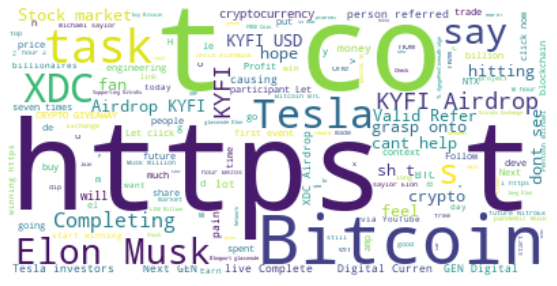

In [17]:
# Create and generate a word cloud image:
wordcloud = WordCloud(background_color="white").generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# Remarks

Note that the tweet reading process takes a while and could be improved. Will try to add some more functionality!

This short demonstration is just the starting point and I would further try to make some complex changes to this use case so that the potential of NLP and Data Science could be fully utilized. ALOHA !

# References

1. https://macxima.medium.com/python-how-to-extract-tweets-from-twitter-996727d9a14
2. https://towardsdatascience.com/extracting-data-from-twitter-using-python-5ab67bff553a
3. https://www.nltk.org
4. https://www.datacamp.com/community/tutorials/wordcloud-python
